In [1]:
import braidz_analysis as bz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
from tqdm import tqdm
import scipy
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde
import pynumdiff

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import seaborn as sns

base_folder = r"/Volumes/New Volume/Braidz Files"
cm2inch = 1 / 2.54

2025-02-10 10:15:44,959 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [2]:
J74_raw_data = bz.braidz.read_braidz(["20240911_151201.braidz", "20240913_141235.braidz", "20240915_140001.braidz"], base_folder)
J73_raw_data = bz.braidz.read_braidz(["20240912_140309.braidz", "20240914_140037.braidz"], base_folder)
J31_raw_data = bz.braidz.read_braidz(["20241109_185224.braidz", "20241209_141918.braidz", "20241211_140152.braidz"], base_folder )
J59_raw_data = bz.braidz.read_braidz(["20241210_140025.braidz", "20241212_145945.braidz", "20241214_141136.braidz"], base_folder)
J64_raw_data = bz.braidz.read_braidz(["20240924_161949.braidz", "20241206_140404.braidz"], base_folder)
J55_raw_data = bz.braidz.read_braidz(["20250202_142014.braidz", "20250203_141416.braidz", "20250204_144955.braidz", "20250205_150839.braidz", "20250207_143550.braidz"], base_folder)


In [3]:
J74_opto_data = bz.processing.get_stim_or_opto_data(J74_raw_data["df"], J74_raw_data["opto"], type="opto")
J73_opto_data = bz.processing.get_stim_or_opto_data(J73_raw_data["df"], J73_raw_data["opto"], type="opto")
J31_opto_data = bz.processing.get_stim_or_opto_data(J31_raw_data["df"], J31_raw_data["opto"], type="opto")
J59_opto_data = bz.processing.get_stim_or_opto_data(J59_raw_data["df"], J59_raw_data["opto"], type="opto")
J64_opto_data = bz.processing.get_stim_or_opto_data(J64_raw_data["df"], J64_raw_data["opto"], type="opto")
J55_opto_data = bz.processing.get_stim_or_opto_data(J55_raw_data["df"], J55_raw_data["opto"], type="opto")






100%|██████████| 932/932 [00:16<00:00, 56.11it/s]


In [4]:
J74_opto_data_filtered = bz.filtering.filter_data_dict(
    J74_opto_data,
    (J74_opto_data["frames_in_radius"] >= 15) & (J74_opto_data["sham"] == 0)
)

J73_opto_data_filtered = bz.filtering.filter_data_dict(
    J73_opto_data,
    (J73_opto_data["frames_in_radius"] >= 15) & (J73_opto_data["sham"] == 0)
)


J31_opto_data_filtered = bz.filtering.filter_data_dict(
    J31_opto_data,
    (J31_opto_data["frames_in_radius"] >= 15) & (J31_opto_data["sham"] == 0)
)

J59_opto_data_filtered = bz.filtering.filter_data_dict(
    J59_opto_data,
    (J59_opto_data["frames_in_radius"] >= 15) & (J59_opto_data["sham"] == 0)
)

J64_opto_data_filtered = bz.filtering.filter_data_dict(
    J64_opto_data,
    (J64_opto_data["frames_in_radius"] >= 15) & (J64_opto_data["sham"] == 0)
)

J55_opto_data_filtered = bz.filtering.filter_data_dict(
    J55_opto_data,
    (J55_opto_data["frames_in_radius"] >= 15) & (J55_opto_data["sham"] == 0)
)


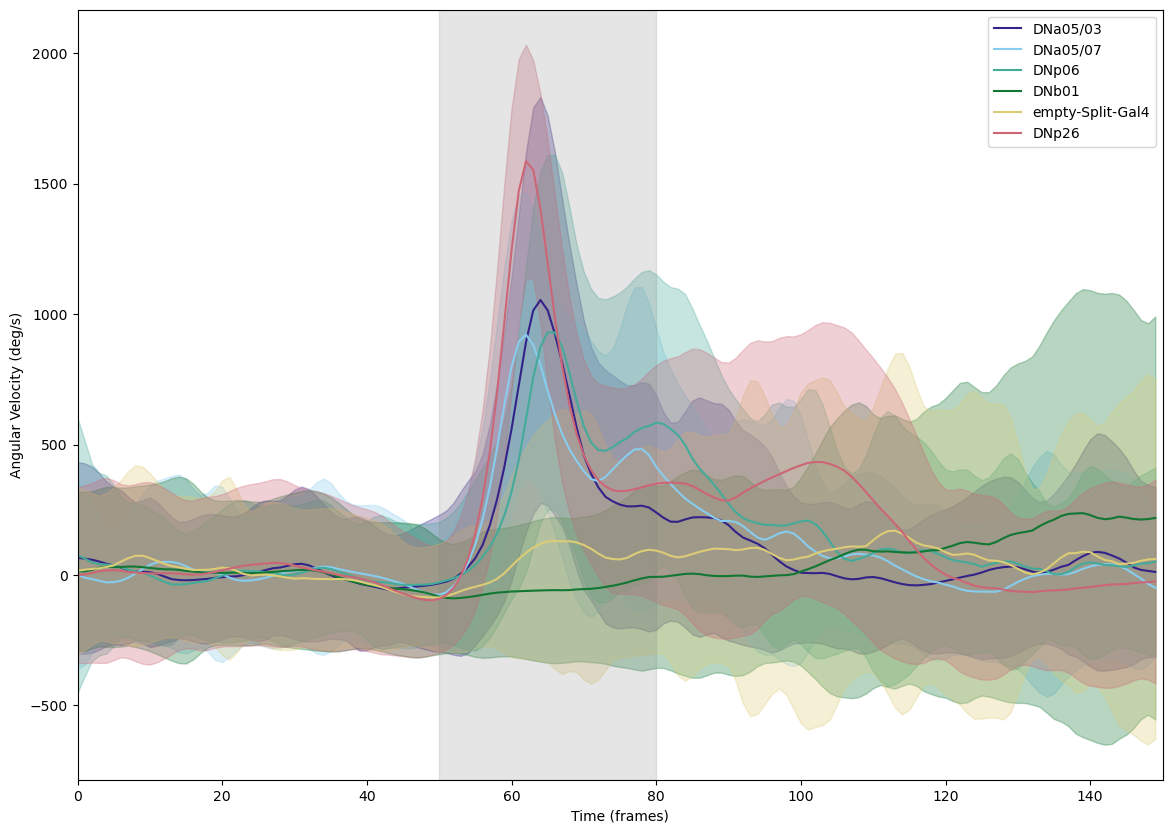

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define Nature-like color palette (Paul Tol's scientific color schemes)
nature_colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#DDCC77", "#CC6677"]  

fig = plt.figure(figsize=(14, 10), constrained_layout=False)
ax1 = fig.add_subplot()

bz.plotting.plot_angular_velocity(
    J74_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[0],  # Deep blue
    convert_to_degrees=True,
    label="DNa05/03"
)

bz.plotting.plot_angular_velocity(
    J73_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[1],  # Light blue
    convert_to_degrees=True,
    label="DNa05/07"
)

bz.plotting.plot_angular_velocity(
    J59_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[2],  # Teal green
    convert_to_degrees=True,
    label="DNp06"
)

bz.plotting.plot_angular_velocity(
    J31_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[3],  # Deep green
    convert_to_degrees=True,
    label="DNb01"
)

bz.plotting.plot_angular_velocity(
    J64_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[4],  # Soft yellow
    convert_to_degrees=True,
    label="empty-Split-Gal4"
)

bz.plotting.plot_angular_velocity(
    J55_opto_data_filtered,
    ax=ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color=nature_colors[5],  # Reddish pink
    convert_to_degrees=True,
    label="DNp26"
)

ax1.axvspan(50, 80, color='grey', alpha= 0.2)


ax1.legend(loc="best")
plt.show()


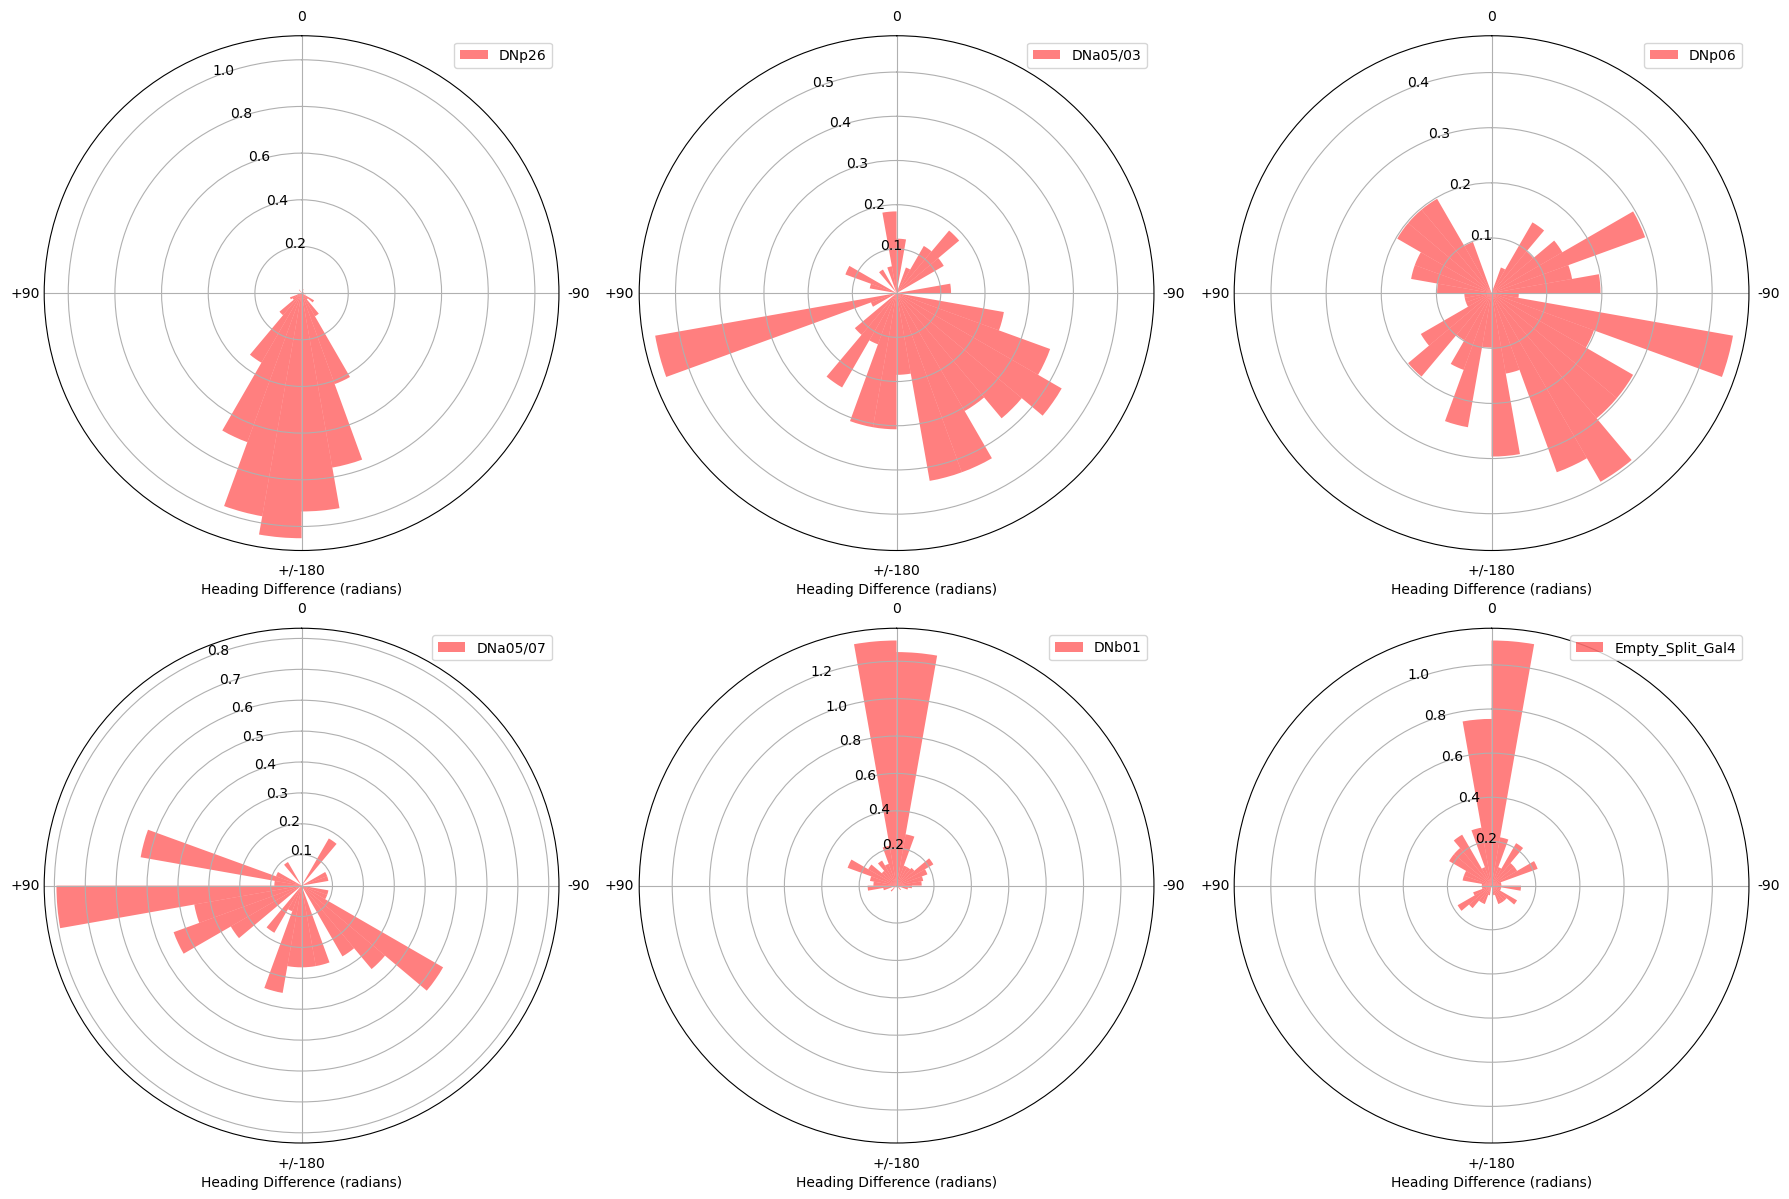

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size and layout
num_groups = 6  # Total groups
group_labels = ["DNp26", "DNa05/03", "DNp06", "DNa05/07", "DNb01", "Empty_Split_Gal4"]  # Adjust as needed
data_list = [J55_opto_data_filtered, J74_opto_data_filtered, J59_opto_data_filtered, J73_opto_data_filtered, J31_opto_data_filtered, J64_opto_data_filtered]  # Your datasets

fig, axes = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(18, 12))  # 2 rows, 3 columns

# Loop through each dataset and create a separate polar plot
for ax, data, label in zip(axes.flat, data_list, group_labels):
    bz.plotting.plot_heading_difference(data, ax=ax, convert_to_degrees=False, density=True, color="red", label=label, alpha=0.5)
    
    ax.legend(loc="best")
    ax.set_theta_zero_location("N")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
    ax.set_xticklabels(["0", "+90", "+/-180", "-90"])
    ax.set_ylabel("")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [6]:
def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [7]:
def sg_smooth(df, columns = ["x", "y", "z", "xvel", "yvel"], **kwargs):
    """
    Apply Savitzky-Golay filter to smooth specified columns in a DataFrame.
    """
    for col in columns:
        df[col] = savgol_filter(df[col], window_length=kwargs.get("window_length", 21), polyorder=kwargs.get("polyorder", 3))
    return df

def detect_response_peak(angular_velocity, start_idx, search_window=50, height=np.deg2rad(300), distance=50):
    """
    Detects the response peak in the angular velocity signal within a specified search window.
    """
    from scipy.signal import find_peaks

    # Define search region
    end_idx = min(start_idx + search_window, len(angular_velocity))
    search_region = angular_velocity[start_idx:end_idx]

    # Look for peaks in both directions
    peaks_pos, _ = find_peaks(search_region, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-search_region, height=height, distance=distance)

    all_peaks = np.concatenate([peaks_pos, peaks_neg])
    response_direction = ["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg)

    sort_idx = np.argsort(all_peaks)
    all_peaks = all_peaks[sort_idx]
    response_direction = np.array(response_direction)[sort_idx]

    if len(all_peaks) > 0:
        # Return the first peak found (relative to stimulus onset)
        return start_idx + all_peaks[0], response_direction[0]
    return None, None


def compute_heading_change(
    theta_unwrap,
    center_idx,
    k_frames=10,
    method="mean",
    buffer_frames=None,
    x=None,
    y=None,
):
    """
    Compute the change in heading around a specified index using different methods.
    """
    if method == "mean":
        # Ensure bounds including buffer if specified
        buffer = buffer_frames if buffer_frames is not None else 0
        total_frames_needed = k_frames + buffer

        if (
            center_idx - total_frames_needed < 0
            or center_idx + total_frames_needed >= len(theta_unwrap)
        ):
            return None

        # Compute mean heading before and after, respecting buffer
        pre_heading = np.mean(
            theta_unwrap[center_idx - total_frames_needed : center_idx - buffer]
        )
        post_heading = np.mean(
            theta_unwrap[center_idx + buffer : center_idx + total_frames_needed]
        )

        # Compute change and wrap to [-π, π]
        heading_change = np.arctan2(
            np.sin(post_heading - pre_heading), np.cos(post_heading - pre_heading)
        )

    elif method == "vector":
        if x is None or y is None:
            raise ValueError("x and y coordinates are required for vector method")

        # Ensure bounds
        if center_idx - k_frames < 0 or center_idx + k_frames >= len(x):
            return None

        # Get points at distance k from peak
        pre_x = x[center_idx - k_frames]
        pre_y = y[center_idx - k_frames]
        post_x = x[center_idx + k_frames]
        post_y = y[center_idx + k_frames]

        # Calculate vectors
        pre_vector = np.array([x[center_idx] - pre_x, y[center_idx] - pre_y])
        post_vector = np.array([post_x - x[center_idx], post_y - y[center_idx]])

        # Normalize vectors
        pre_vector = pre_vector / np.linalg.norm(pre_vector)
        post_vector = post_vector / np.linalg.norm(post_vector)

        # Calculate angle between vectors
        dot_product = np.clip(np.dot(pre_vector, post_vector), -1.0, 1.0)
        heading_change = np.arccos(dot_product)

        # Determine sign of angle (positive for CCW, negative for CW)
        cross_product = np.cross(pre_vector, post_vector)
        heading_change *= np.sign(cross_product)

    else:
        raise ValueError("Method must be either 'mean' or 'vector'")

    return heading_change


def process_saccade(
    sac_idx, angular_velocity, linear_velocity, x, y, z, stim_idx, theta_unwrap
):
    """
    Processes a saccade event and extracts relevant information if it meets certain criteria.
    """

    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # Skip if window is out of bounds
    if sac_idx - WINDOW_SIZE < 0 or sac_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Skip if saccade is in stimulus window
    if stim_idx is not None and stim_idx <= sac_idx <= stim_idx + WINDOW_SIZE:
        return None

    # Skip if outside arena bounds
    if not (
        ARENA_BOUNDS["z"][0] <= z[sac_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[sac_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[sac_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Extract velocity windows
    ang_vel_window = angular_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    lin_vel_window = linear_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    turning_direction = "pos" if angular_velocity[sac_idx] > 0 else "neg"

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, sac_idx, method="vector", k_frames=25, x=x, y=y
    )

    return (
        "spontaneous",
        ang_vel_window,
        lin_vel_window,
        heading_change,
        turning_direction,
    )


def process_stimulus_window(
    stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap, default_delay=30
):
    """
    Process the stimulus window, including heading change calculation.
    """
    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # First check if initial window is out of bounds
    if stim_idx - WINDOW_SIZE < 0 or stim_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Check arena bounds at stimulus time
    if not (
        ARENA_BOUNDS["z"][0] <= z[stim_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[stim_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[stim_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Try to detect a response
    response_idx, response_direction = detect_response_peak(
        angular_velocity,
        stim_idx,
        search_window=50,
        height=np.deg2rad(300),
        distance=10,
    )

    if response_idx is not None:
        # Response detected - align to response
        center_idx = response_idx
        group = "stimulus_response"
    else:
        # No response detected - use default delay
        center_idx = stim_idx + default_delay
        group = "stimulus_no_response"
        response_direction = "none"

    # Check if the aligned window is within bounds
    if center_idx - WINDOW_SIZE < 0 or center_idx + WINDOW_SIZE >= len(
        angular_velocity
    ):
        return None

    # Extract velocity windows aligned to either response or default delay
    ang_vel_window = angular_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]
    lin_vel_window = linear_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, center_idx, method="vector", k_frames=25, x=x, y=y
    )
    return group, ang_vel_window, lin_vel_window, heading_change, response_direction


def detect_saccades_both(angular_velocity, height=np.deg2rad(300), distance=40):
    """
    Detect saccades in both positive and negative directions.
    """
    from scipy.signal import find_peaks

    peaks_pos, _ = find_peaks(angular_velocity, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-angular_velocity, height=height, distance=distance)

    peaks_concat = np.concatenate([peaks_pos, peaks_neg])

    # get directions list
    directions = np.array(["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg))

    # get sorting indices
    sort_idx = np.argsort(peaks_concat)

    # return sorted peaks and directions
    return peaks_concat[sort_idx], np.array(directions)[sort_idx]


def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [8]:
J74_Results= process_all_trajectories(J74_raw_data["opto"], J74_raw_data["df"])
J73_Results= process_all_trajectories(J73_raw_data["opto"], J73_raw_data["df"])
J59_Results= process_all_trajectories(J59_raw_data["opto"], J59_raw_data["df"])
J64_Results= process_all_trajectories(J64_raw_data["opto"], J64_raw_data["df"])
J31_Results= process_all_trajectories(J31_raw_data["opto"], J31_raw_data["df"])
J55_Results= process_all_trajectories(J55_raw_data["opto"], J55_raw_data["df"])

  0%|          | 0/334 [00:00<?, ?it/s]/var/folders/qf/y7jqh9357vj8xz0frb7cn9q40000gn/T/ipykernel_1085/341144974.py:99: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(pre_vector, post_vector)
100%|██████████| 932/932 [00:17<00:00, 54.00it/s]


In [9]:
# Option 3: Science journal palette (Nature style)
cp = ["#4c72b0", "#dd8452", "#55a868", "#8172b3","#da8bc3","FFD770"]

/var/folders/qf/y7jqh9357vj8xz0frb7cn9q40000gn/T/ipykernel_1085/497047402.py:116: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df_cleaned, x="Group", y="Percentage", hue="Direction", palette=cp)


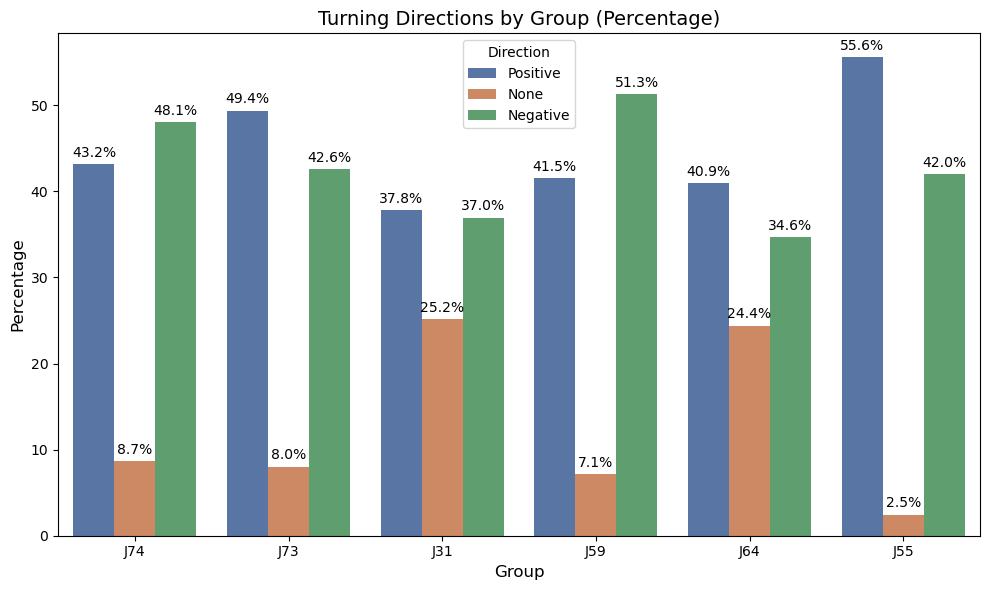

In [ ]:
# create long dataframe with all data
J74_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J74_Results["groups"]]
)
J74_turning_directions = np.array(J74_Results["turning_directions"])[
    J74_stimulus_mask
]
J74_pos_turn_count = sum(J74_turning_directions == "pos")
J74_neg_turn_count = sum(J74_turning_directions == "neg")
J74_none_turn_count = sum(J74_turning_directions == "none")

J73_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J73_Results["groups"]]
)
J73_turning_directions = np.array(J73_Results["turning_directions"])[
    J73_stimulus_mask
]
J73_pos_turn_count = sum(J73_turning_directions == "pos")
J73_neg_turn_count = sum(J73_turning_directions == "neg")
J73_none_turn_count = sum(J73_turning_directions == "none")

J31_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J31_Results["groups"]]
)
J31_turning_directions = np.array(J31_Results["turning_directions"])[
    J31_stimulus_mask
]
J31_pos_turn_count = sum(J31_turning_directions == "pos")
J31_neg_turn_count = sum(J31_turning_directions == "neg")
J31_none_turn_count = sum(J31_turning_directions == "none")

J59_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J59_Results["groups"]]
)
J59_turning_directions = np.array(J59_Results["turning_directions"])[
    J59_stimulus_mask
]
J59_pos_turn_count = sum(J59_turning_directions == "pos")
J59_neg_turn_count = sum(J59_turning_directions == "neg")
J59_none_turn_count = sum(J59_turning_directions == "none")

J64_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J64_Results["groups"]]
)
J64_turning_directions = np.array(J64_Results["turning_directions"])[
    J64_stimulus_mask
]
J64_pos_turn_count = sum(J64_turning_directions == "pos")
J64_neg_turn_count = sum(J64_turning_directions == "neg")
J64_none_turn_count = sum(J64_turning_directions == "none")

J55_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J55_Results["groups"]]
)
J55_turning_directions = np.array(J55_Results["turning_directions"])[
    J55_stimulus_mask
]
J55_pos_turn_count = sum(J55_turning_directions == "pos")
J55_neg_turn_count = sum(J55_turning_directions == "neg")
J55_none_turn_count = sum(J55_turning_directions == "none")



a